In [1]:
import numpy as np

import pymc3 as pm
import matplotlib.pyplot as plt
import arviz as az

import pandas as pd

In [122]:
df = pd.read_csv("./data/oec.csv", delimiter=',')
df

,PlanetIdentifier,TypeFlag,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,Eccentricity,PeriastronDeg,LongitudeDeg,AscendingNodeDeg,...,LastUpdated,RightAscension,Declination,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,HostStarAgeGyr,ListsPlanetIsOn
0,HD 143761 b,0,1.0450,NaN,39.845800,0.2196,0.037,270.60,NaN,NaN,...,16/07/11,16 01 03,+33 18 13,17.236,0.889,1.362,-0.31,5627.0,NaN,Confirmed planets
1,HD 143761 c,0,0.0790,NaN,102.540000,0.4123,0.050,190.00,NaN,NaN,...,16/07/11,16 01 03,+33 18 13,17.236,0.889,1.362,-0.31,5627.0,NaN,Confirmed planets
2,KOI-1843.03,0,0.0014,0.054,0.176891,0.0048,NaN,NaN,NaN,NaN,...,13/07/15,19 00 03.14,+40 13 14.7,NaN,0.460,0.450,0.00,3584.0,NaN,Controversial
3,KOI-1843.01,0,NaN,0.114,4.194525,0.0390,NaN,NaN,NaN,NaN,...,NaN,19 00 03.14,+40 13 14.7,NaN,0.460,0.450,0.00,3584.0,NaN,Controversial
4,KOI-1843.02,0,NaN,0.071,6.356006,0.0520,NaN,NaN,NaN,NaN,...,NaN,19 00 03.14,+40 13 14.7,NaN,0.460,0.450,0.00,3584.0,NaN,Controversial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3579,eta Cet b,0,2.4600,NaN,407.300000,1.2700,0.170,247.20,NaN,NaN,...,15/12/11,01 08 35.39148,-10 10 56.1570,37.990,1.700,14.300,0.12,4528.0,NaN,Confirmed planets
3580,eta Cet c,0,3.1600,NaN,744.300000,1.9300,0.020,36.67,NaN,NaN,...,15/12/11,01 08 35.39148,-10 10 56.1570,37.990,1.700,14.300,0.12,4528.0,NaN,Confirmed planets
3581,HD 108874 b,0,1.3600,NaN,395.400000,1.0510,0.070,NaN,NaN,NaN,...,10/12/29,12 30 26,+22 52 47,68.500,1.000,1.220,0.14,5407.0,NaN,Confirmed planets
3582,HD 108874 c,0,1.0180,NaN,1605.800000,2.6800,0.250,NaN,NaN,NaN,...,10/12/29,12 30 26,+22 52 47,68.500,1.000,1.220,0.14,5407.0,NaN,Confirmed planets


In [123]:
df.columns

Index(['PlanetIdentifier', 'TypeFlag', 'PlanetaryMassJpt', 'RadiusJpt',
       'PeriodDays', 'SemiMajorAxisAU', 'Eccentricity', 'PeriastronDeg',
       'LongitudeDeg', 'AscendingNodeDeg', 'InclinationDeg', 'SurfaceTempK',
       'AgeGyr', 'DiscoveryMethod', 'DiscoveryYear', 'LastUpdated',
       'RightAscension', 'Declination', 'DistFromSunParsec',
       'HostStarMassSlrMass', 'HostStarRadiusSlrRad', 'HostStarMetallicity',
       'HostStarTempK', 'HostStarAgeGyr', 'ListsPlanetIsOn'],
      dtype='object')

<AxesSubplot:xlabel='Eccentricity', ylabel='PeriodDays'>

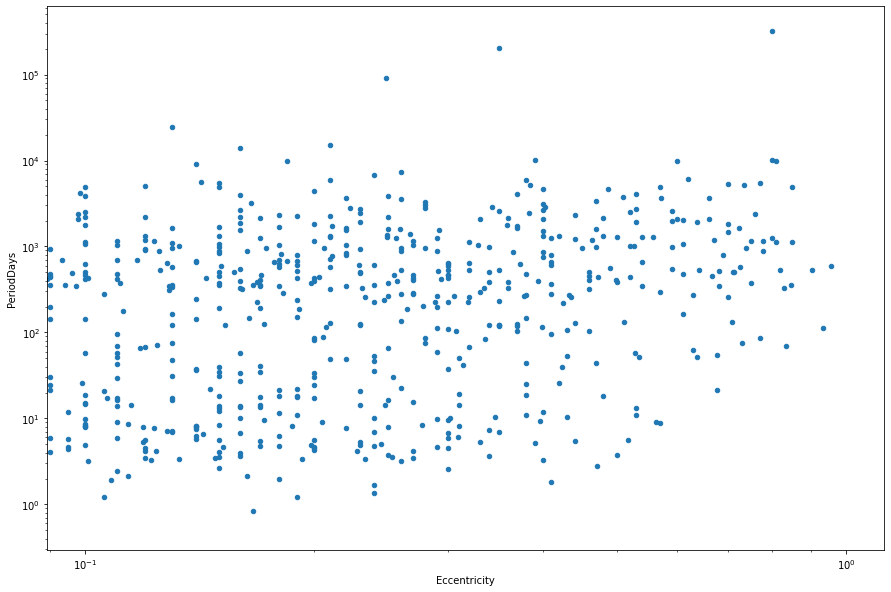

In [208]:
fig, ax = plt.subplots(figsize=(15,10))
df.plot(x='PeriodDays', y='SemiMajorAxisAU', kind='scatter', ax=ax, logx=True, logy=True)
# ax.set_ylim([0,3])
# ax.set_xlim([0,1000])

<AxesSubplot:xlabel='SemiMajorAxisAU', ylabel='SurfaceTempK'>

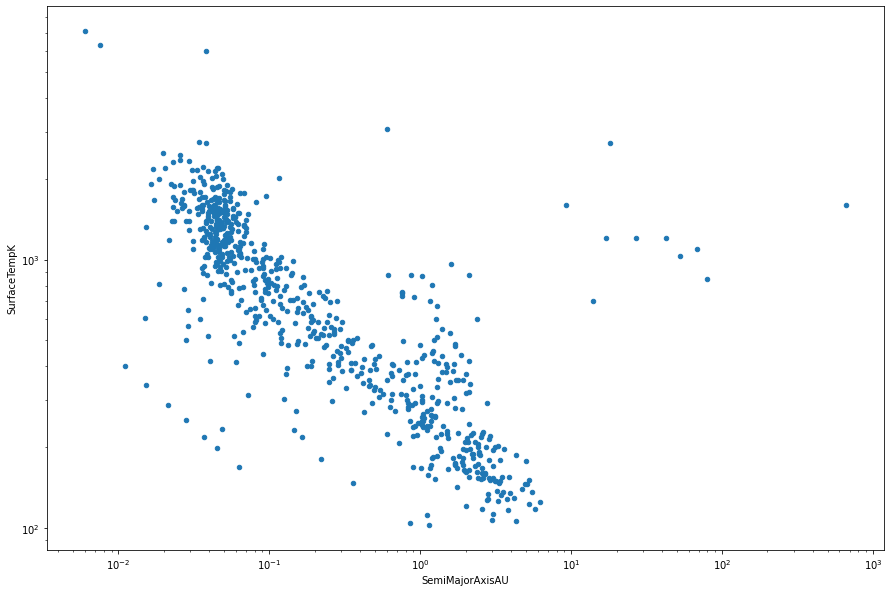

In [217]:
fig, ax = plt.subplots(figsize=(15,10))
df.plot(x='SemiMajorAxisAU', y='SurfaceTempK', kind='scatter', ax=ax, logx=True, logy=True)
# ax.set_ylim([0,3])
# ax.set_xlim([0,1000])

In [141]:
x = np.log(df['PeriodDays'].to_numpy())
y = np.log(df['SemiMajorAxisAU'].to_numpy())
data = {'x': x, 'y': y}

In [144]:
with pm.Model() as model:
    pm.GLM.from_formula('y ~ x', data)
    trace = pm.sample(2000, cores=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, x, Intercept]
Sampling 2 chains, 0 divergences: 100%|██████████| 5000/5000 [00:09<00:00, 524.29draws/s]
The acceptance probability does not match the target. It is 0.8988384166895773, but should be close to 0.8. Try to increase the number of tuning steps.


array([[<AxesSubplot:title={'center':'Intercept'}>,
        <AxesSubplot:title={'center':'Intercept'}>],
       [<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'x'}>],
       [<AxesSubplot:title={'center':'sd'}>,
        <AxesSubplot:title={'center':'sd'}>]], dtype=object)

<Figure size 864x864 with 0 Axes>

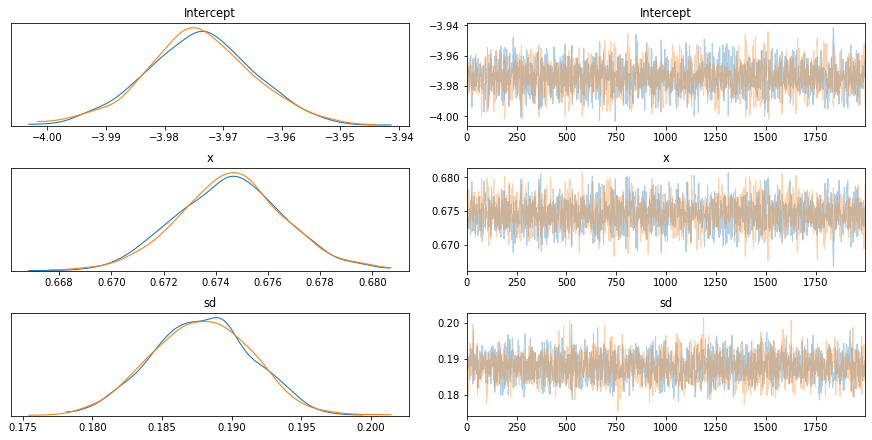

In [152]:
plt.figure(figsize=(12, 12))
pm.traceplot(trace)

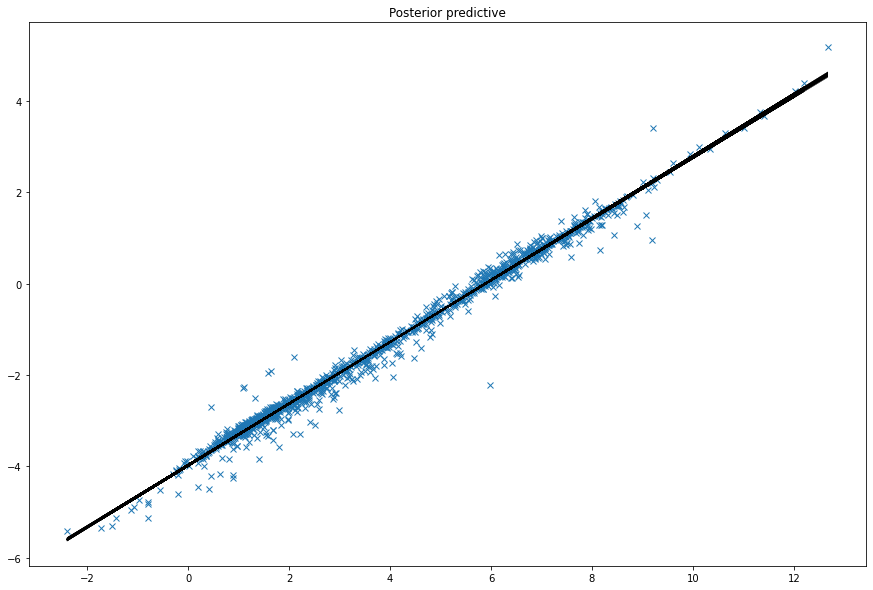

In [205]:
fig, ax = plt.subplots(figsize=(15,10))
# df.plot(x='PeriodDays', y='SemiMajorAxisAU', kind='scatter', ax=ax, logx=True, logy=True)
# plt.figure(figsize=(12, 12))
plt.plot(x, y, 'x', label='data')
pm.plot_posterior_predictive_glm(trace, ,samples=200, label='posterior')



In [199]:
trace['Intercept']

array([-3.99119101, -3.98638118, -3.98638118, ..., -3.97724961,
       -3.98058541, -3.99349325])

In [ ]:
az.plot_ppc

In [175]:
with model:
    pp_trace = pm.sample_posterior_predictive(trace, 200, random_seed=42)

100%|██████████| 200/200 [00:00<00:00, 202.40it/s]


In [190]:
x.shape

(3584,)

In [191]:
pp_trace['y'].shape

(200, 1359)

arviz.data.io_pymc3 - WARNING - posterior predictive shape not compatible with number of chains and draws. This can mean that some draws or even whole chains are not represented.


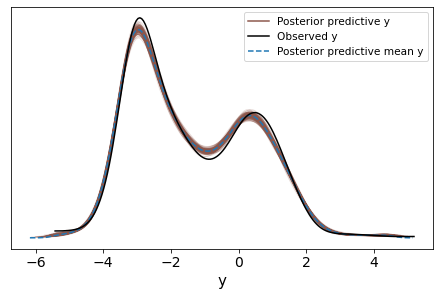

In [192]:
idata = az.from_pymc3(trace, posterior_predictive=pp_trace)
az.plot_ppc(idata);